In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def hist_equalization(im):
    # print(pr)
    out = np.zeros(im.shape)
    nop = im.shape[0] * im.shape[1]
    # print(im)
    pr = np.bincount(im.flatten(), minlength=256) / nop
    cr = np.cumsum(pr)
    # out = np.floor(255 * np.cu)
    out = np.floor(cr[im] * 255).astype(np.uint8)
    return out, cr

In [3]:
def plt_im_hist(im, title="Image & Histogram", fig=1):
    plt.figure(fig)
    plt.suptitle(title)
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(im, "gray")
    plt.subplot(122)
    plt.ylim((0,1000))
    plt.hist(im.ravel(),256,[0,256])
    plt.show()

In [4]:
def hist_matching(im, ref_img):
    out = np.copy(im)
    _, cr_im = hist_equalization(im)
    _, cr_ref_im = hist_equalization(ref_img)
    
    out_gray = np.interp(cr_im, cr_ref_im, np.arange(0, 256))
    out = out_gray[im]
    # plt_im_hist(out, title="Matched Image", fig=3)
    # print('out', out)
    return out.astype(np.uint8)

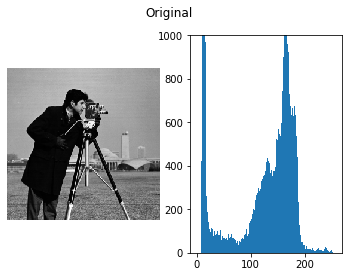

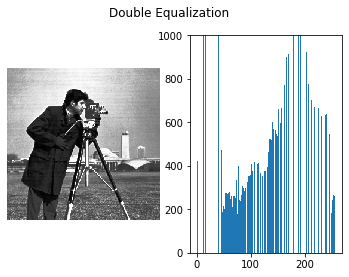

In [5]:
img = cv2.imread("cameraman.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out,_ = hist_equalization(img)
out2, _ = hist_equalization(out)
plt_im_hist(img, "Original")
plt_im_hist(out2, "Double Equalization")


As histogram equalization is a self-inverse function applying histogram equalization twice will give with input image, but in the above case as the image is discrete some values will be missed when applying histogram equalization so that's why  we can see that the structure of histogram same but the images look differently in visual

In [6]:
smht_1 = cv2.imread("same_hist_1.png")
smht_2 = cv2.imread("same_hist_2.png")
smht_1 = cv2.cvtColor(smht_1, cv2.COLOR_BGR2GRAY)
smht_2 = cv2.cvtColor(smht_2, cv2.COLOR_BGR2GRAY)

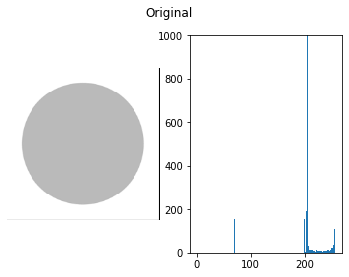

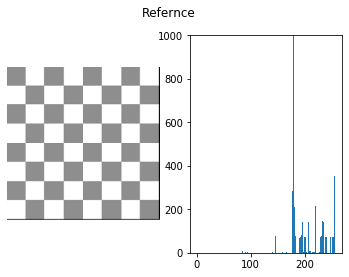

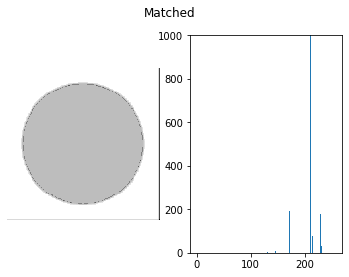

In [7]:
matched = hist_matching(smht_1, smht_2)
plt_im_hist(smht_1, "Original")
plt_im_hist(smht_2, "Refernce")
plt_im_hist(matched, "Matched")

In [8]:
dark = cv2.imread("dark.png")
light = cv2.imread("light.jpg")
dark = cv2.cvtColor(dark, cv2.COLOR_BGR2GRAY)
light = cv2.cvtColor(light, cv2.COLOR_BGR2GRAY)


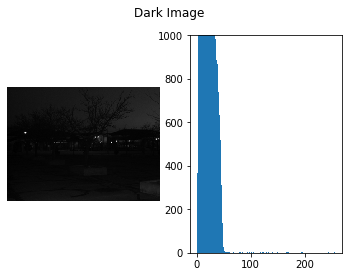

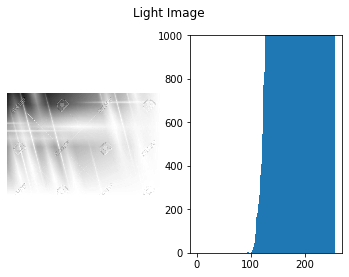

In [9]:
plt_im_hist(dark, "Dark Image")
plt_im_hist(light, "Light Image")

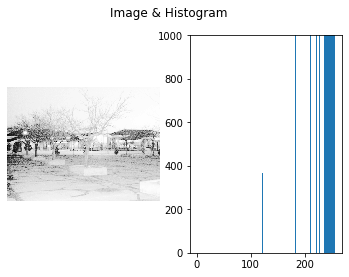

In [10]:
#dark on light
out = hist_matching(dark, light)
plt_im_hist(out)

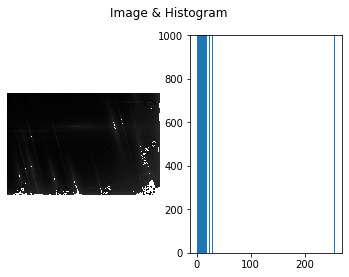

In [11]:
#light on dark
out = hist_matching(light, dark)
plt_im_hist(out)